# 데이터 전처리(인코딩)

인코딩 방식(문자->숫자)
- 레이블 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

In [3]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행

#인코딩
encoder=LabelEncoder()
encoder.fit(items)
print(encoder.transform(items)) 

[0 1 4 5 3 3 2 2]


In [4]:
print("인코딩 클래스: ", encoder.classes_) #0,1,2,3,4,5에 대응하는 것

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [5]:
#디코딩
print("디코딩 원본 값: ", encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 원-핫 인코딩

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [7]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)
labels = label.reshape(-1,1) #2차원 데이터 변형
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [12]:
#원-핫 인코딩 적용- fit과 transform
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_label = oh_encoder.transform(labels)

print(oh_label)
print("\n원-핫 인코딩 데이터")
print(oh_label.toarray())
print("\n원-핫 인코딩 차원")
print(oh_label.shape)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원-핫 인코딩 차원
(8, 6)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
#판다스로 한번에 원-핫 인코딩하기(숫자형으로 변환할 필요도 없음!)
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링(Feature scaling)- 표준화(StandardScaler), 정규화(MinMaxScaler)

standardscaler(표준화)
- 개별 피처를 평균이 0, 분산이 1인 값으로 변환해줌.

In [22]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
print("feature들의 평균값")
print(iris_df.mean())
print("\nfeature들의 분산값")
print(iris_df.var()) #평균, 분산 값이 컬럼별로 표준화되어 있지 않죠?

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [24]:
#StandardScaler를 이용해 각 피처를 한 번에 표준화해 봅시다!
from sklearn.preprocessing import StandardScaler

In [25]:
#StandardScaler 객체 생성
scaler=StandardScaler()
#fit, transform 메서드를 활용해 데이터셋 변환
scaler.fit(iris_df)
scaler.transform(iris_df)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [27]:
iris_scaled=scaler.transform(iris_df)
iris_scaled_df=pd.DataFrame(iris_scaled,columns=iris.feature_names)
iris_scaled_df.head() #변환된 iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [28]:
#그럼 이제 컬럼별 평균, 분산값이 달라졌을까?
print("feature들의 평균값")
print(iris_scaled_df.mean())
print("\nfeature들의 분산값")
print(iris_scaled_df.var())
#오, 평균은 0에 가깝고 분산은 1에 모두 가까워졌어요~

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


정규화(MinMaxScaler)
- 데이터값을 0과 1 사이의 범위 값으로 변환함.

In [29]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()

In [30]:
#fit, transform 메서드 활용해 데이터셋 변환
scaler.fit(iris_df)
scaler.transform(iris_df)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [31]:
#transform() 시 스케일 변환된 데이터셋은 numpy ndarray, 이를 df 반환
iris_scaled=scaler.transform(iris_df)
iris_scaled_df=pd.DataFrame(iris_scaled,columns=iris.feature_names)
iris_scaled_df.head() #변환된 iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [33]:
print("feature들의 평균값")
print(iris_scaled_df.mean())
print("\nfeature들의 분산값")
print(iris_scaled_df.var())
#minmaxscaler는 컬럼별 평균, 분산을 같게 만들어 주는 것은 아니고, 그저 0-1 사이 값으로 변환시켜주는 것임.

feature들의 평균값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature들의 분산값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


In [32]:
#그러니 최소, 최댓값을 살펴보면 0과 1로 나옴을 알 수 있음!
print("feature들의 최솟값")
print(iris_scaled_df.min())
print("\nfeature들의 최댓값")
print(iris_scaled_df.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# 타이타닉 데이터를 이용해 타이타닉 생존자를 예측해보기

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
#결측값 처리
df.Age.fillna(df.Age.mean(),inplace=True)
df.Cabin.fillna('N',inplace=True)
df.Embarked.fillna('N',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
df.Cabin.value_counts() #앞문자만 추출하도록 하자. 두세개가 섞여들어간 게 많군?

N              687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
E101             3
F2               3
D                3
C22 C26          3
B5               2
E8               2
D36              2
D35              2
E33              2
E24              2
C123             2
B49              2
C125             2
C92              2
E121             2
E67              2
C52              2
C65              2
B51 B53 B55      2
F4               2
C126             2
D26              2
E25              2
B28              2
C2               2
              ... 
B78              1
C82              1
B42              1
B37              1
B69              1
C91              1
T                1
E49              1
C7               1
A19              1
A6               1
B19              1
E77              1
D6               1
A16              1
A24              1
B82 B84          1
B71              1
A23              1
D7               1
B50              1
D46         

In [44]:
#요렇게 전처리
df.Cabin=df.Cabin.str[:1]
df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [43]:
df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


- 성별이 생존 확률에 영향을 미쳤을까? (성별에 따른 생존자 수 비교)

In [46]:
df.groupby(['Sex','Survived'])['Survived'].count() #0:사망, 1:생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


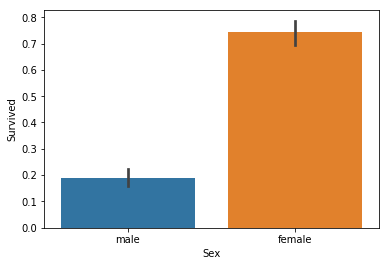

In [47]:
#시각화
sns.barplot('Sex','Survived', data=df) #생존 비율로 나타냄.(여: 74.2% 남:18.8%)

- 부자인지 가난한지가 생존에 영향을 끼쳤을까?(pclass에 따른 생존자 수 비교)

In [48]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

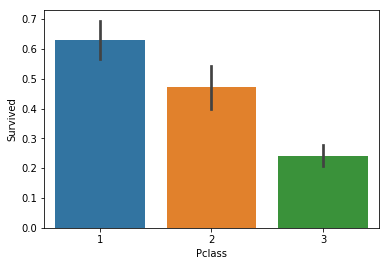

In [49]:
sns.barplot('Pclass','Survived',data=df)

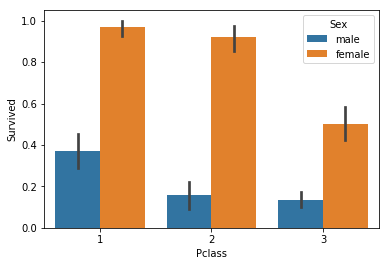

In [50]:
sns.barplot('Pclass','Survived',hue='Sex',data=df)

In [51]:
#age category 나누기_ get_category 함수는 age를 인자로 받아 cat을 반환.
def get_category(age):
    cat=' '
    if age <=-1 : cat='unknwon'
    elif age <=5 : cat='Baby'
    elif age <=12 : cat='Child'
    elif age <=18: cat='Teenager'
    elif age <=25: cat='Student'
    elif age <=35: cat='Young-Adult'
    elif age <=60: cat='Adult'
    else:
        cat='Elderly'
    return cat

In [58]:
group_name=['unknwon','Baby','Child','Teenager','Student','Young-Adult','Adult','Elderly']
df['Age_cat']=df['Age'].apply(get_category)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young-Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young-Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young-Adult


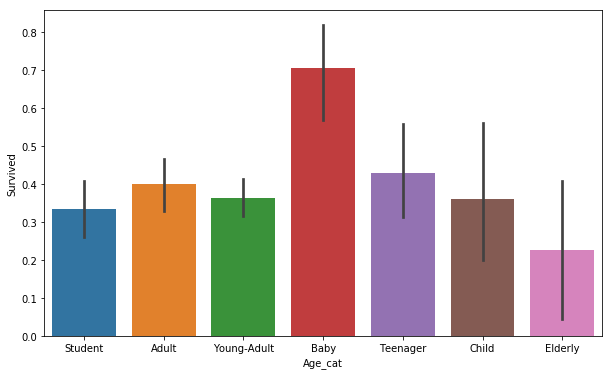

In [59]:
plt.figure(figsize=(10,6))
sns.barplot('Age_cat','Survived',data=df) #x축의 순서가 다름. 직접 순서를 설정해주고 싶다면 order 옵션 설정해주자.

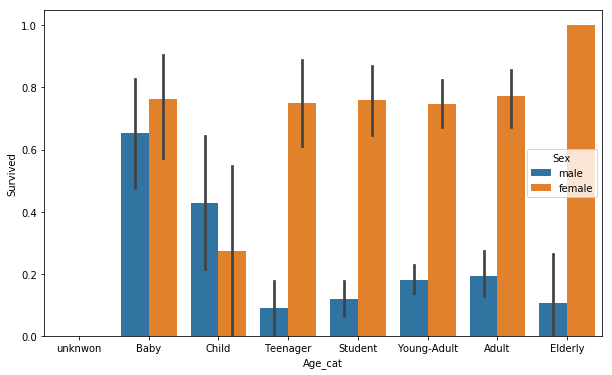

In [60]:
plt.figure(figsize=(10,6))
sns.barplot('Age_cat','Survived',hue='Sex',data=df,order=group_name)

In [63]:
#레이블 인코딩(문자->숫자. 3개변수에 대해(sex,cabin,embarked))
from sklearn import preprocessing

def encode_features(data):
    features=['Cabin','Sex','Embarked']
    for i in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(data[i])
        data[i]=le.transform(data[i])
    return data

In [64]:
new_df=encode_features(df)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young-Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young-Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young-Adult


In [65]:
new_df.Cabin.unique()

array([7, 2, 4, 6, 3, 0, 1, 5, 8], dtype=int64)

## 본격 머신러닝! y:'Survived', x: 그 외 숫자형 변수들

In [77]:
y_df=new_df['Survived']
X_df=new_df.drop(['Survived','PassengerId','Name','Ticket','Age_cat'],axis=1)

In [79]:
X_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
#결정트리, RF, 로지스틱 Classifier 각각 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

In [83]:
##결정트리
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

0.7877094972067039


In [84]:
##RF
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print(accuracy_score(y_test,rf_pred))

0.8324022346368715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
##로지스틱
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print(accuracy_score(y_test,lr_pred)) #3개 알고리즘 중에선, 로지스틱의 정확도가 가장 높음.

0.8659217877094972


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
#교차검증
##kfold

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_df)):
        X_train, X_test = X_df.values[train_index], X_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
        
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    mean_score = np.mean(scores) #5개 fold의 평균 정확도
    print('평균 정확도: {0:.4f}'.format(mean_score))


In [89]:
exec_kfold(dt_clf)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [90]:
exec_kfold(rf_clf)

교차 검증 0 정확도: 0.7989
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8202
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8315
평균 정확도: 0.8013


In [91]:
exec_kfold(lr_clf)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7472
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [92]:
##cross_val_score()
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [93]:
scores=cross_val_score(rf_clf, X_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7654
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8588
평균 정확도: 0.8071


In [94]:
scores=cross_val_score(lr_clf, X_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.7933
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8192
평균 정확도: 0.7879


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [95]:
##GridSearchCV- 결정트리
from sklearn.model_selection import GridSearchCV

params={'max_depth': [2,3,5,10], 'min_samples_split': [2,3,5], 'min_samples_leaf': [1,5,8]}

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=121)

grid_dclf=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [97]:
print(grid_dclf.best_params_) #최적의 하이퍼 파라미터
print(grid_dclf.best_score_) #그 때의 스코어

best_dclf=grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy) #테스트셋에서의 정확도

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8328651685393258
0.8044692737430168


In [101]:
#RF
grid_rclf=GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_rclf.fit(X_train, y_train)

print(grid_rclf.best_params_) #최적의 하이퍼 파라미터
print(grid_rclf.best_score_) #그 때의 스코어

best_rclf=grid_rclf.best_estimator_
pred = best_rclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy) #테스트셋에서의 정확도

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8328651685393258
0.8044692737430168
